# Case Study Project - Boat Sales
Hi, this is Case Study Project for DataCamp certification.

### 1. First we start with importing packages anddata

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('boat_data.csv')
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


### 2. Set price to be same currency (**EUR**) and set the Location to be just first word (country) for every boat:
* check unique currencies
* create dictionary with currancy and EURO exchange rate
* we set price to be value multiplied by exchange rate

In [203]:
data['Price'].apply(lambda x: x.split(' ')[0]).unique()

array(['CHF', 'EUR', 'DKK', 'Â£'], dtype=object)

In [204]:
currency = {'CHF': 0.97, 'EUR': 1.0, 'DKK': 0.13, 'Â£': 1.20}
def change_currency(row):
    split = row.split(' ')
    return float(split[1]) * currency[split[0]]
data['Currency'] = data['Price'].apply(lambda x: str(x).split(' ')[0])
data['Price'] = data['Price'].apply(change_currency)
data['Location'] = data['Location'].apply(lambda x: str(x).split(' ')[0])

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
0,3236.89,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226,CHF
1,3490.00,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,EUR
2,3656.90,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,CHF
3,3367.00,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64,DKK
4,3399.00,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,EUR


### 3. Check in which countries most viwed boats are located

In [205]:
df = data.drop(data[data['Location'] == 'Lake'].index)
df = df.groupby('Location')['Number of views last 7 days'].agg(['size', 'mean'])
df.index
df = df[(df['size'] > 5) & (df['mean'] > 130)].sort_values('mean', ascending=False)

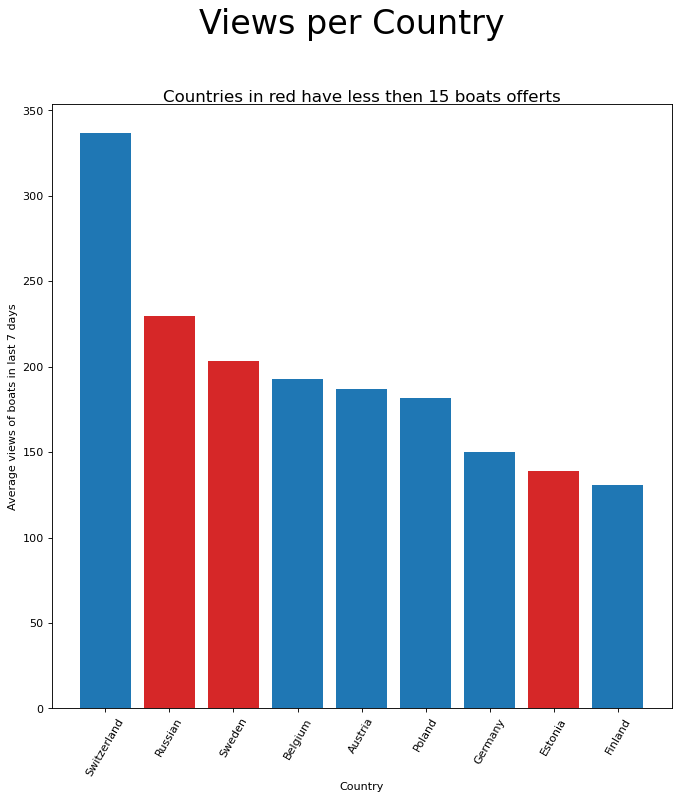

In [206]:
colors = ['tab:red' if x < 15 else 'tab:blue' for x in df['size']]
plt.figure(figsize=(10, 10), dpi=80)
plt.bar(x=df.index, height=df['mean'], color=colors)
plt.suptitle('Views per Country', size = 30, va='center')
plt.title('Countries in red have less then 15 boats offerts', size = 15, va='center')
plt.xlabel('Country')
plt.ylabel('Average views of boats in last 7 days')
plt.xticks(rotation = 60)
plt.savefig('foo.png', bbox_inches='tight')
plt.show()

### 4. Check if new, old or display boats are the most popular

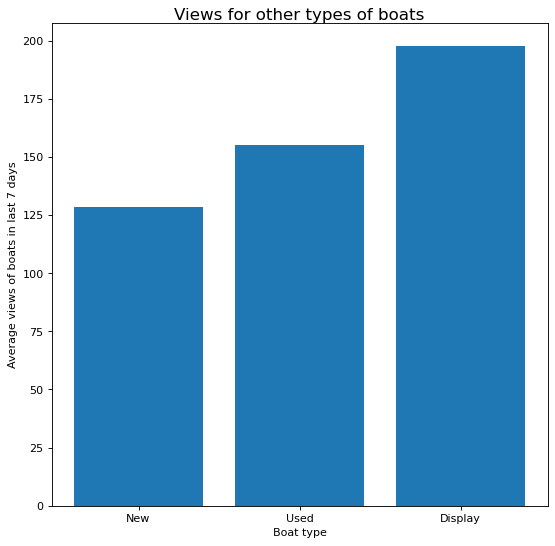

In [207]:
df = data
df['New'] = df['Type'].apply(lambda x: 'new' in str(x))
df['Used'] = df['Type'].apply(lambda x: 'Used' in str(x))
df['Display'] = df['Type'].apply(lambda x: 'Display' in str(x))

plt.figure(figsize=(8, 8), dpi=80)
plt.bar(x=['New', 'Used', 'Display'], 
        height=[df[df['New']]['Number of views last 7 days'].mean(), 
                df[df['Used']]['Number of views last 7 days'].mean(), 
                df[df['Display']]['Number of views last 7 days'].mean()])
plt.title('Views for other types of boats', size = 15, va='center')
plt.xlabel('Boat type')
plt.ylabel('Average views of boats in last 7 days')
plt.savefig('foo.png', bbox_inches='tight')
plt.show()

### 5. Check if views depends on price 
* split data into 10 even bins e.g. last bin is the 10% most expensive boats 

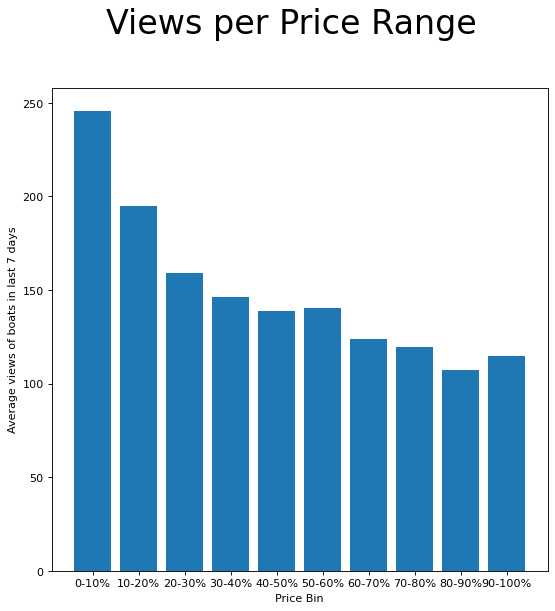

In [208]:
df = data.groupby(pd.cut(data['Price'], data['Price'].quantile([x/10 for x in range(11)])))['Number of views last 7 days'].agg(['size', 'mean'])

plt.figure(figsize=(8, 8), dpi=80)
plt.bar(x=[f'{x}-{x+10}%' for x in range(0, 100,10)], height=df['mean'])
plt.suptitle('Views per Price Range', size = 30, va='center')
plt.xlabel('Price Bin')
plt.ylabel('Average views of boats in last 7 days')
plt.xticks(size = 10)
plt.savefig('foo.png', bbox_inches='tight')
plt.show()

### 6. Price and location 

In [209]:
df = data.groupby([pd.cut(data['Price'], data['Price'].quantile([x/10 for x in range(11)])), 'Location'])['Number of views last 7 days'].agg(['size', 'mean'])
df[df['size'] > 10].sort_values('mean', ascending=False).head(25)

,,size,mean
Price,Location,,
"(3224.0, 21000.0]",Switzerland,250,383.936000
"(21000.0, 35008.0]",Switzerland,176,378.267045
"(92000.0, 135000.0]",Switzerland,111,324.234234
"(49900.0, 68580.0]",Switzerland,122,321.934426
"(581045.23, 31000000.0]",Switzerland,18,315.611111
"(299000.0, 581045.23]",Switzerland,49,314.326531
"(35008.0, 49900.0]",Switzerland,147,306.258503
"(135000.0, 199000.0]",Switzerland,75,303.506667
"(68580.0, 92000.0]",Switzerland,98,300.816327


### 7. Views per currency

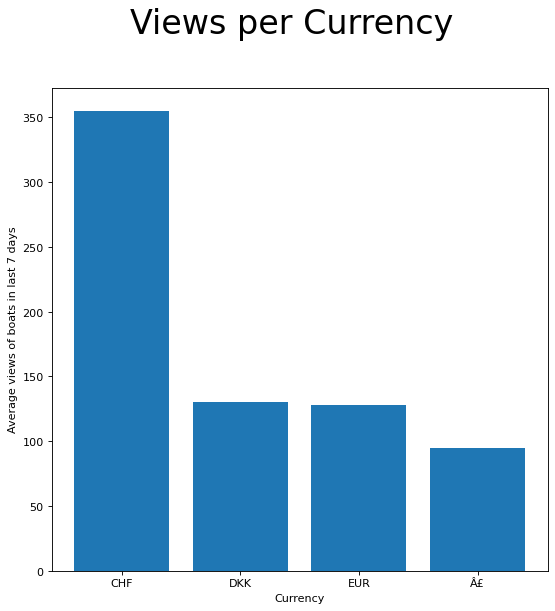

,size,mean
Currency,,
CHF,980,355.094898
DKK,180,129.872222
EUR,8430,127.559193
Â£,298,94.657718


In [210]:
df = data.groupby('Currency')['Number of views last 7 days'].agg(['size', 'mean'])
plt.figure(figsize=(8, 8), dpi=80)
plt.bar(x=df.index, height=df['mean'])
plt.suptitle('Views per Currency', size = 30, va='center')
plt.xlabel('Currency')
plt.ylabel('Average views of boats in last 7 days')
plt.xticks(size = 10)
plt.savefig('foo.png', bbox_inches='tight')
plt.show()
df.head()